<h1>Airline Analysis</h1>
<p>In this project, you’ll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
<ul>
<li>miles: miles traveled through the flight</li>
<li>passengers: number of passengers on the flight</li>
<li>delay: take-off delay in minutes</li>
<li>inflight_meal: is there a meal included in the flight?</li>
<li>inflight_entertainment: are there free entertainment systems for each seat?</li>
<li>inflight_wifi: is there complimentary wifi on the flight?</li>
<li>day_of_week: day of the week of the flight</li>
<li>weekend: did this flight take place on a weekend</li>
<li>coach_price: the average price paid for a coach ticket</li>
<li>firstclass_price: the average price paid for first-class seats</li>
<li>hours: how many hours the flight took</li>
<li>redeye: was this flight a redeye (overnight)?</li>
</ul>
</p>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB
None    miles  passengers  delay inflight_meal inflight_entertainment 

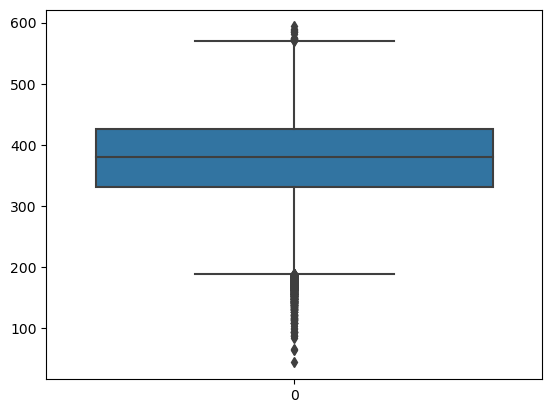

376.59 380.56
123.41


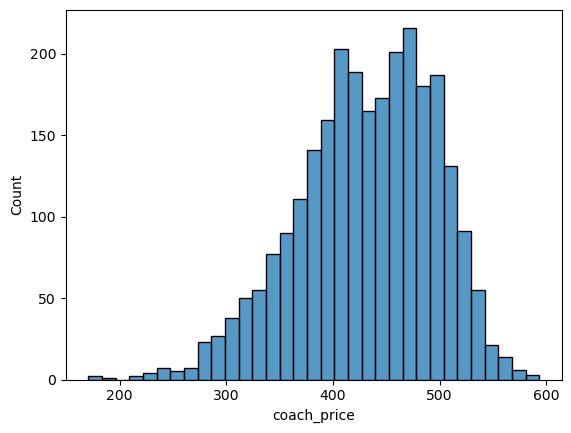

431.83 170.77 593.635
68.17


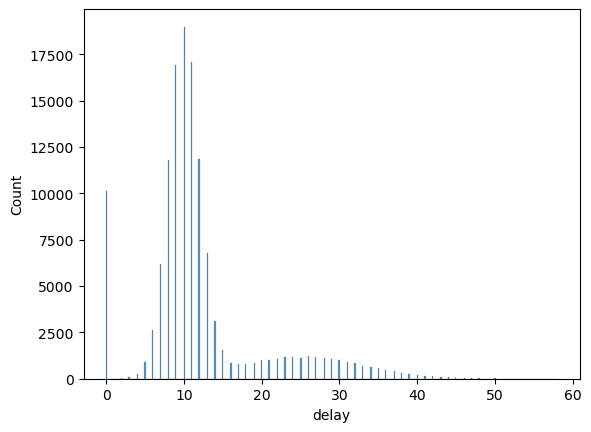

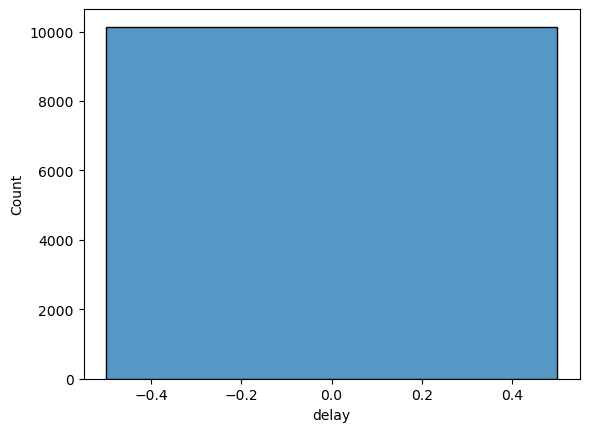

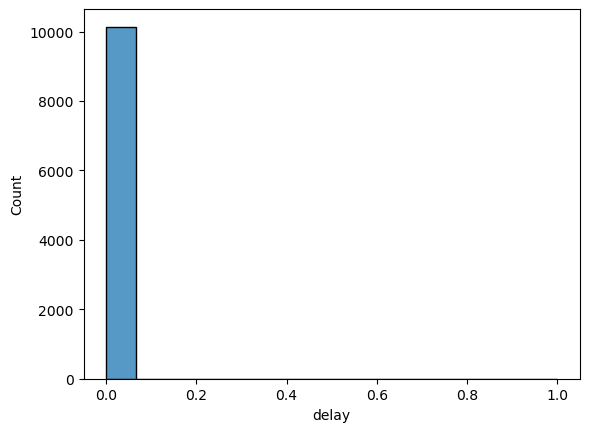

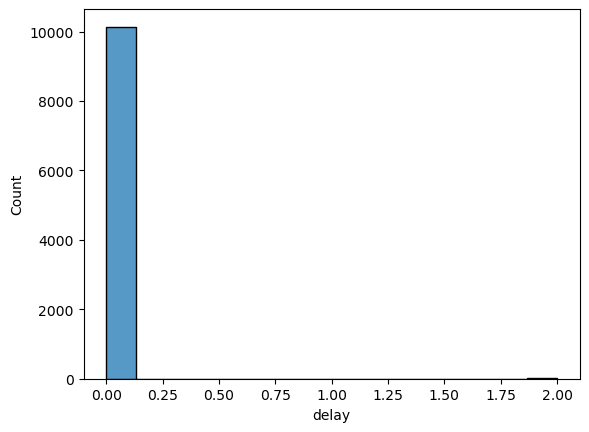

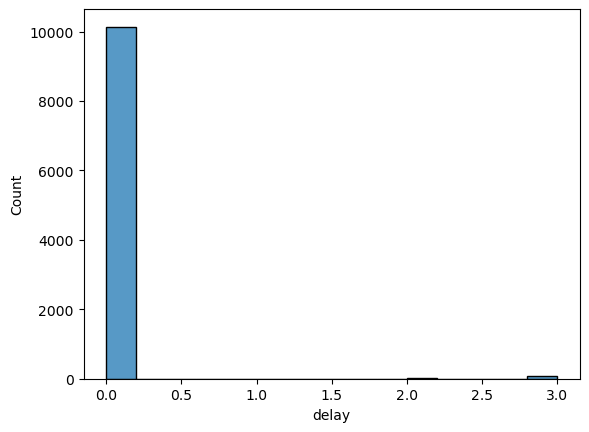

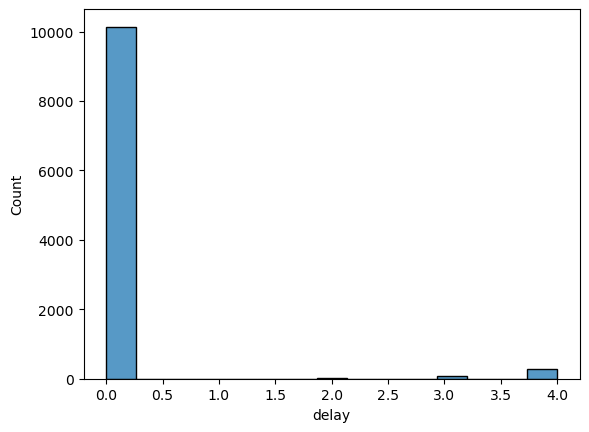

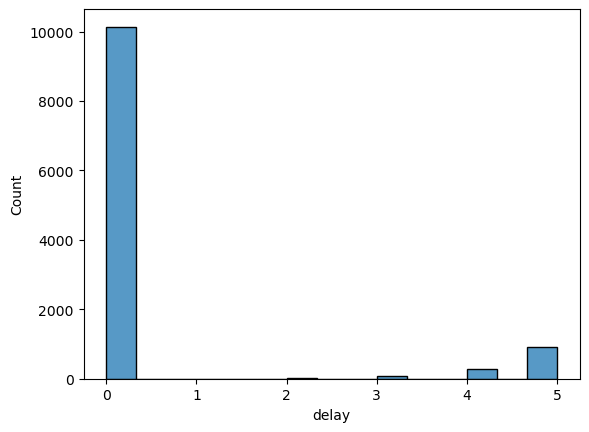

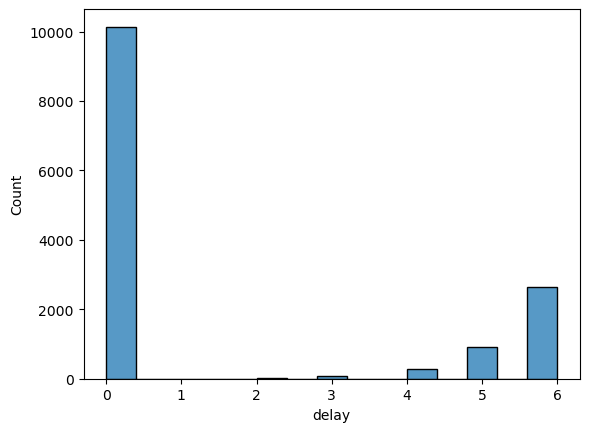

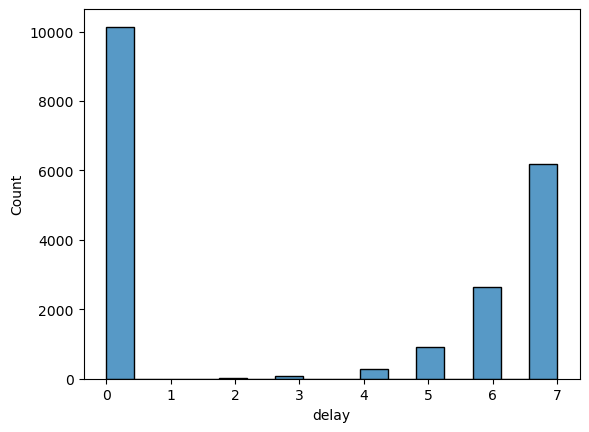

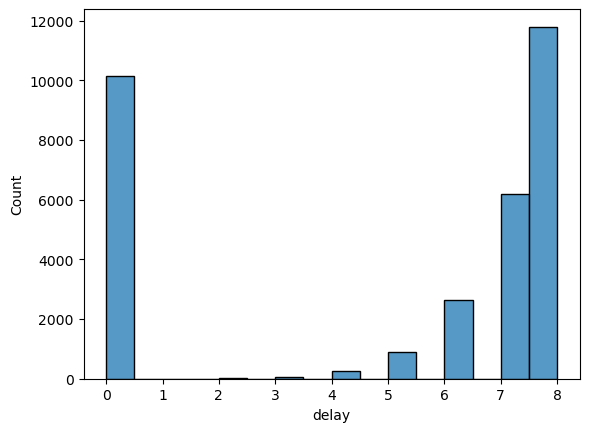

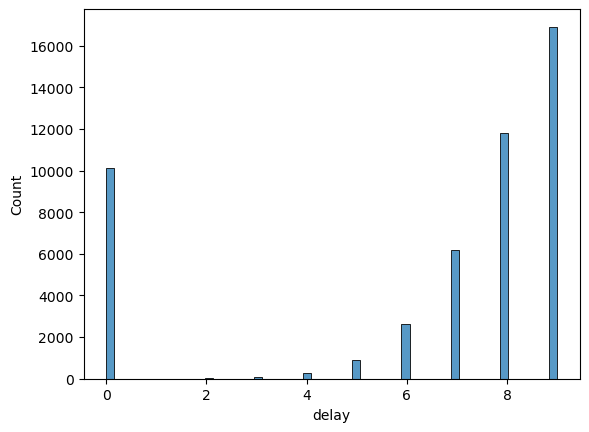

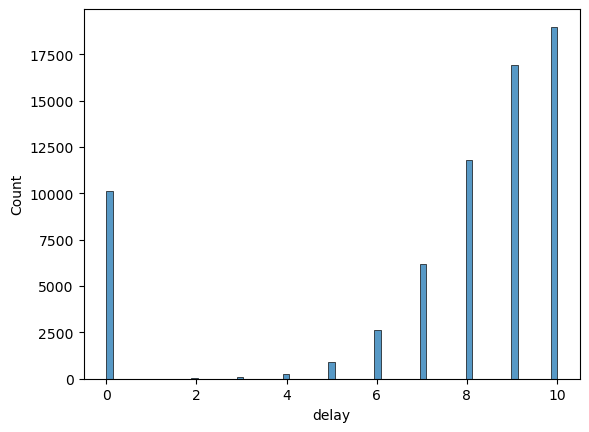

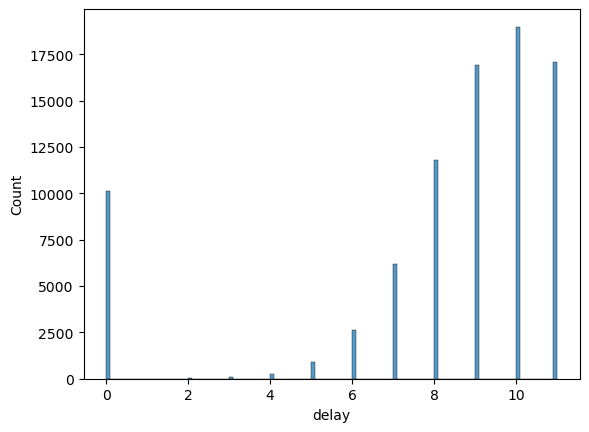

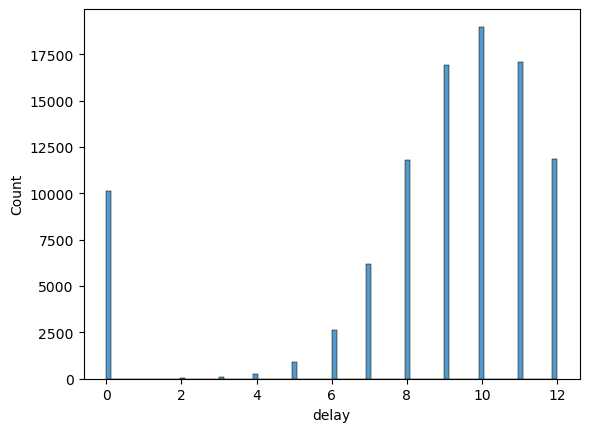

Common to have a 10 min delay


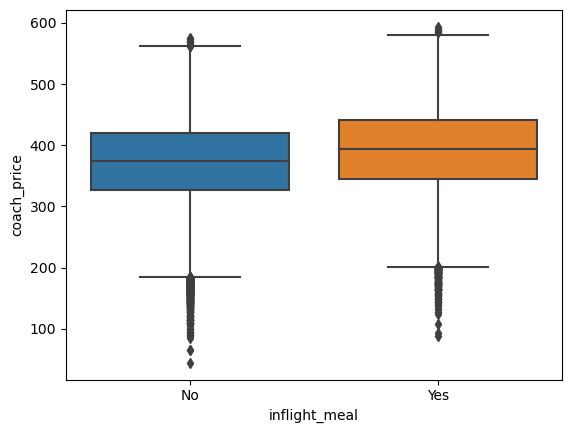

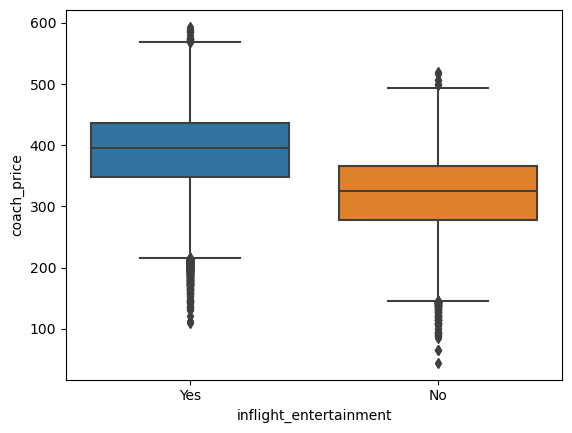

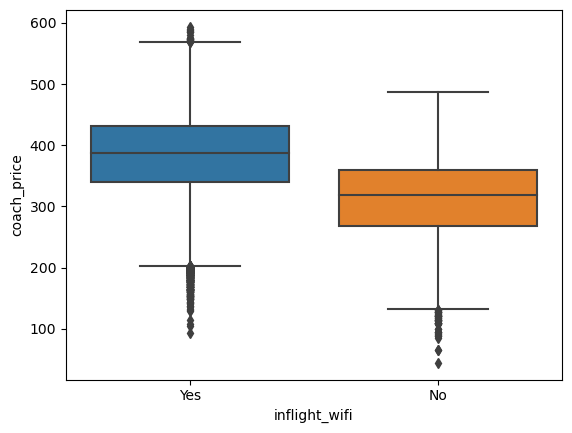

c:\Users\TyQueece\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

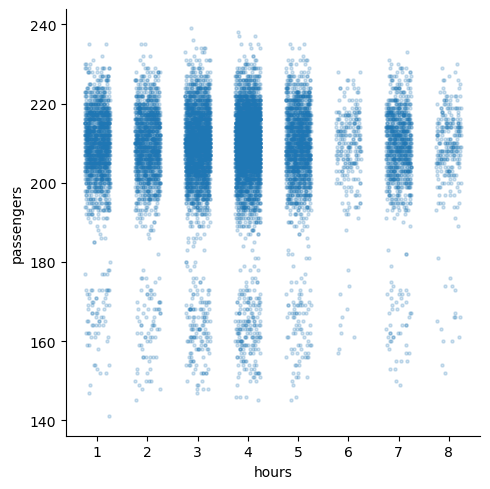

c:\Users\TyQueece\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

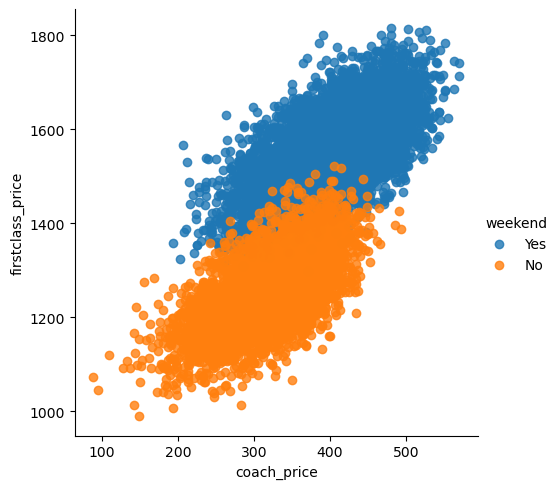

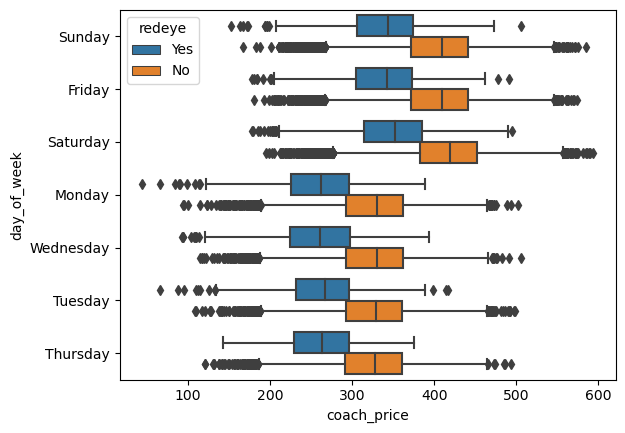

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.info(),flight.head())

## Task 1
sns.boxplot(flight['coach_price'])
plt.show()
plt.clf()
print(round(flight['coach_price'].mean(),2), flight['coach_price'].median())
diff =round(500 - flight['coach_price'].mean(),2)
print(diff)
## Task 2
sns.histplot(flight.coach_price[flight.hours == 8]) 
plt.show()
plt.clf()
print(round(flight.coach_price[flight.hours == 8].mean(),2), flight.coach_price[flight.hours == 8].min(),flight.coach_price[flight.hours == 8].max()
)
diff = round( 500 - flight.coach_price[flight.hours == 8].mean(),2)
print(diff)
## Task 3
sns.histplot(flight.delay[flight.delay <=500])
plt.show()
plt.clf()

i=0
while i<=12:
  sns.histplot(flight.delay[flight.delay <= i])
  plt.show()
  plt.clf()
  i+=1
print('Common to have a 10 min delay')

## Task 4
'''
#sns.scatterplot(flight.coach_price,flight.firstclass_price, s = 5, alpha = 0.5)
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = flight, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()
'''

## Task 5
sns.boxplot(x=flight.inflight_meal, y= flight.coach_price)
plt.show()
plt.clf()
sns.boxplot(x=flight.inflight_entertainment, y=flight.coach_price)
plt.show()
plt.clf()
sns.boxplot(x=flight.inflight_wifi, y=flight.coach_price)
plt.show()
plt.clf()

'''
# As histogram
#Due note, hue is consider the yes/no of inflight features since histplot only takes one argument for x.
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

# As stacked bars
sub_flight = flight[['inflight_meal','inflight_entertainment','inflight_wifi','coach_price']] # or df.loc[:, ['C', 'D', 'E']] /print(sub_flight)
sub_flight.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.show()
plt.clf()
'''
## Task 6
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Task 7
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

## Task 8
sns.boxplot(y = "day_of_week", x = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()

